In [1]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
#from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

In [4]:
(xtrain, ytrain), (xtest, ytest)=cifar10. load_data()
#check type of the train and test type (xtrain)
type(xtrain)

numpy.ndarray

In [6]:
xtrain.shape

(50000, 32, 32, 3)

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)
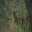

In [7]:
xtrain[10]

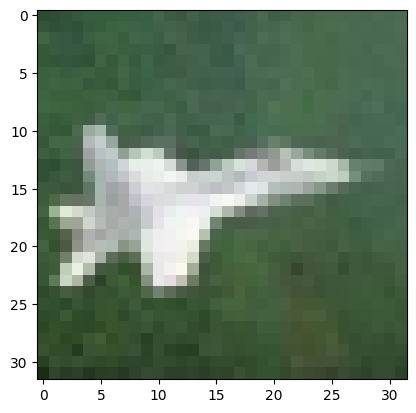

In [8]:
img0=plt.imshow(xtrain[77])


In [9]:
lab1=ytrain[10]
print(lab1)


[4]


In [10]:
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [11]:
print('image class is:',classification[ytrain[10][0]])

image class is: deer


In [12]:
ytrain_one_hot=to_categorical(ytrain)
ytest_one_hot=to_categorical(ytest)

In [13]:
xtrain=xtrain/255
xtest=xtest/255

In [14]:
xtrain[25]

array([[[0.63529412, 0.64313725, 0.50980392],
        [0.64313725, 0.65490196, 0.50196078],
        [0.6627451 , 0.67058824, 0.51372549],
        ...,
        [0.72156863, 0.69019608, 0.5372549 ],
        [0.74509804, 0.72941176, 0.57254902],
        [0.79215686, 0.77647059, 0.63137255]],

       [[0.6       , 0.59215686, 0.46666667],
        [0.61960784, 0.61176471, 0.47058824],
        [0.64313725, 0.63921569, 0.48627451],
        ...,
        [0.69803922, 0.67058824, 0.51372549],
        [0.74117647, 0.72156863, 0.56078431],
        [0.78823529, 0.77647059, 0.61960784]],

       [[0.61568627, 0.59215686, 0.47058824],
        [0.63137255, 0.61176471, 0.4745098 ],
        [0.64313725, 0.62745098, 0.47843137],
        ...,
        [0.69803922, 0.66666667, 0.51372549],
        [0.74509804, 0.72941176, 0.55686275],
        [0.79215686, 0.78039216, 0.61176471]],

       ...,

       [[0.83921569, 0.80392157, 0.75686275],
        [0.83529412, 0.75686275, 0.70980392],
        [0.83529412, 0

In [17]:
#create the architecture
model=Sequential()
#first conv layer
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))
#second conv
model.add(Conv2D(32,(5,5),activation='relu'))
#Pooling Layer two
model.add(MaxPool2D(pool_size=(2,2)))

In [18]:
model.add(Flatten())

In [19]:
model.add(Dense(1000,activation='relu'))
#add Dropout layer
model.add(Dropout(0.5))

In [20]:
model.add(Dense(500,activation='relu'))

In [21]:
model.add(Dropout(0.5))


model.add(Dense(500,activation='relu'))

In [22]:
model.add(Dropout(0.5))
model.add(Dense(250,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [23]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
tr = model.fit(xtrain,ytrain_one_hot,batch_size=256,epochs=1,validation_split=0.2)

157/157 [==============================] - 70s 422ms/step - loss: 1.9219 - accuracy: 0.2554 - val_loss: 1.5565 - val_accuracy: 0.4222


In [27]:
model.evaluate(xtest,ytest_one_hot)

313/313 [==============================] - 7s 23ms/step - loss: 1.5538 - accuracy: 0.4150


[1.5537854433059692, 0.41499999165534973]

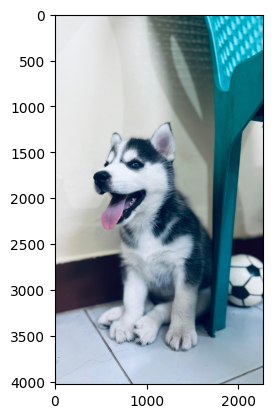

In [28]:
cat = plt.imread('/content/WhatsApp Image 2024-02-21 at 23.07.09 (1).jpeg')
plt.imshow(cat)

In [29]:
from skimage import transform

In [31]:
resize = transform.resize(cat,(32,32,3))

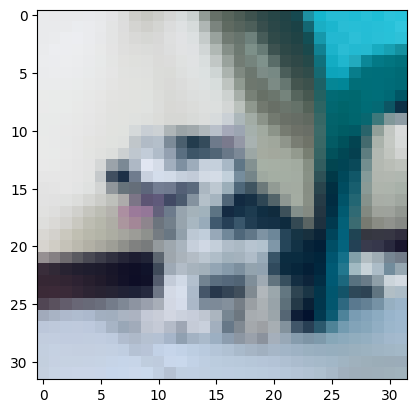

In [32]:
img = plt.imshow(resize)

In [36]:
prediction = model.predict(np.array([resize]))
print(prediction)

1/1 [==============================] - 0s 27ms/step
[[0.11460344 0.34704086 0.01024893 0.00942079 0.00907352 0.00456708
  0.0060806  0.01116468 0.12957042 0.3582297 ]]


In [40]:
list_index = [0,1,2,3,4,5,6,7,8,9]
x = prediction
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
print(list_index)

[9, 1, 8, 0, 7, 2, 3, 4, 6, 5]


In [41]:
for i in range(5):
  print(classification[list_index[i]])

truck
automobile
ship
airplane
horse
